**READING THE DATASET**

In [1]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [3]:
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")
test.head()

The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [4]:
# We will change the Timestamp columns
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converte

In [59]:
#train['month'] = train['timestamp'].dt.month
#train['day'] = train['timestamp'].dt.day
#train['hr'] = train['timestamp'].dt.hour
#train['min'] = train['timestamp'].dt.minute
#train['weekday'] = train['timestamp'].dt.weekday

In [5]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [6]:
train.drop(['timestamp'],axis=1,inplace=True)

In [7]:
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


**Understanding and exploring the columns and dataset better**


In [8]:
DataProfile = ProfileReport(train, title = "Wind Turbine Data Profile Report", explorative=True, minimal=True)
DataProfile.to_file(output_file="./DataProfile.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.describe()

In [63]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

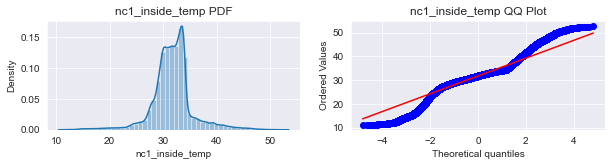

In [59]:
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(train['nc1_inside_temp'])
plt.title('nc1_inside_temp PDF')
plt.subplot(122)
stats.probplot(train['nc1_inside_temp'], dist="norm", plot=plt)
plt.title('nc1_inside_temp QQ Plot')
plt.show()

There are no NULL values to deal with.

In [64]:
# Creating a Numerical dataframe and omitting Timestamp column
train_num = train.select_dtypes(["float64", "int64"])
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


**DATA VISUALIZATION**

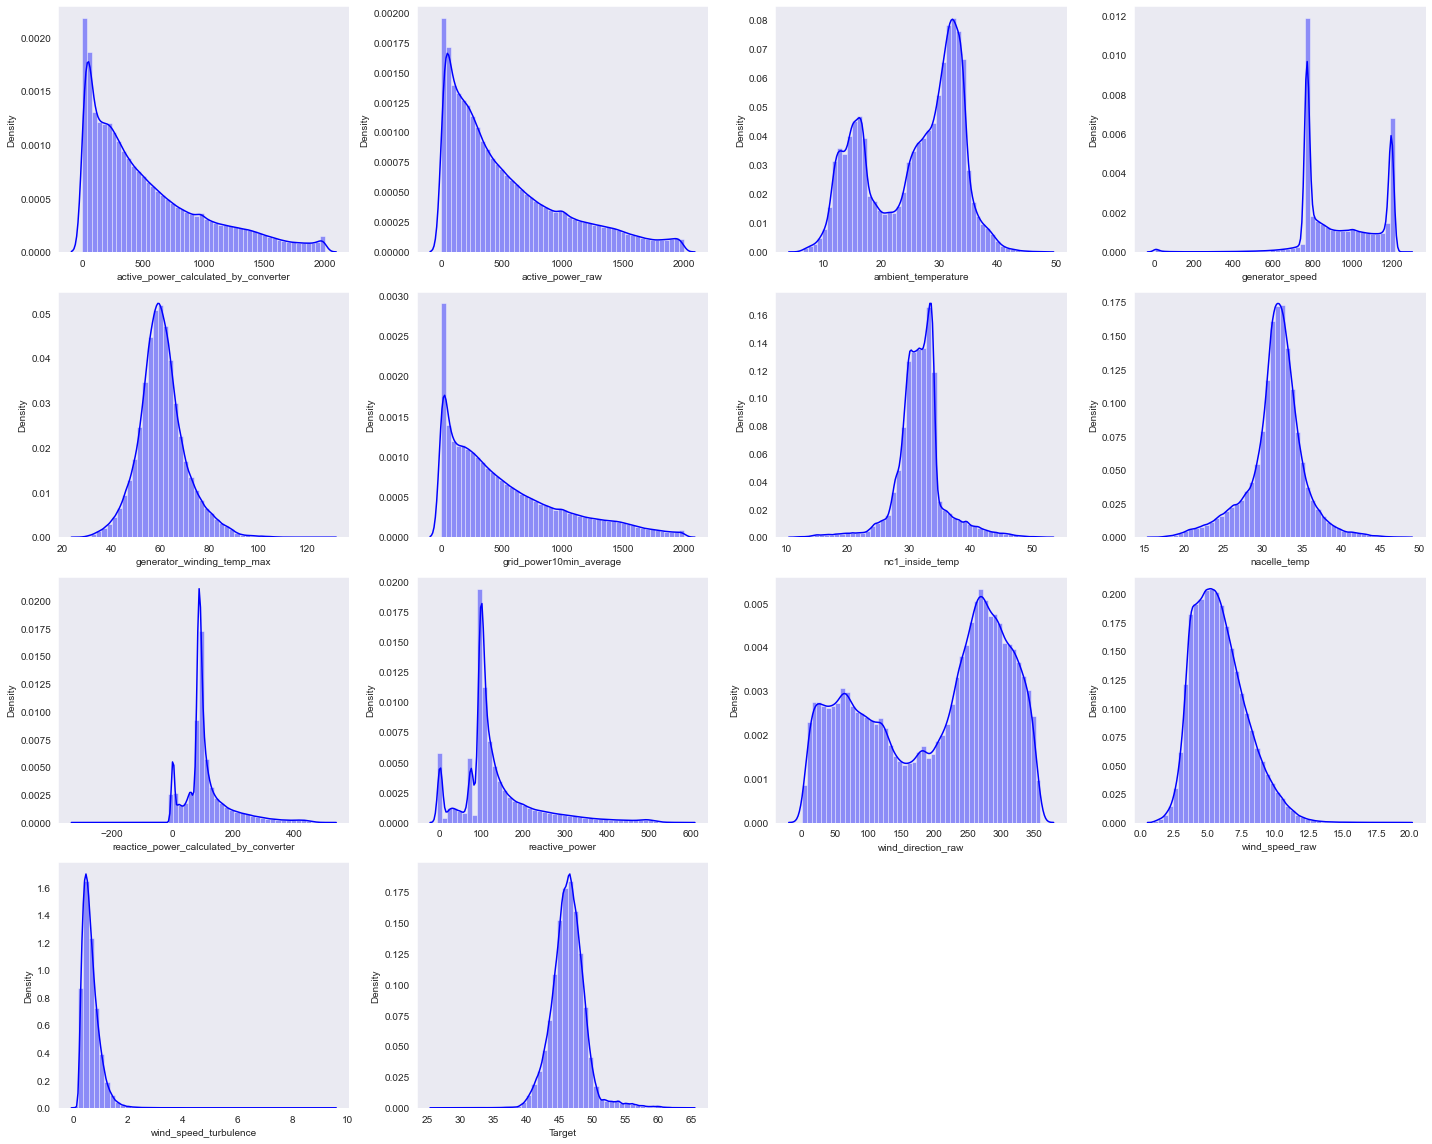

In [65]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train_num)):
    plt.subplot(4,4,i+1)
    sns.distplot(train_num[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

Most of them are all normally distributed; especially the target variable ('Target'). We will look at auto-correlation of features to see if there are some that can be eliminated to ensure we work with most relevant features that impact the Target variable.

In [66]:
num_features = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

In [67]:
for x in num_features:
    
    train[x] = train[x].apply(lambda t : 0.000001 if t <= 0 else t)
    
    train[x] = np.log(train[x])

In [68]:
train

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,6.705194,6.727333,3.456139,7.055845,4.188961,6.822085,3.462041,3.450137,4.952000,5.108980,5.637873,1.954020,-0.608656,Turbine_108,47.582787
1,6.038128,6.042754,2.556836,6.833837,4.087174,6.099319,3.478890,3.489079,4.490729,4.734752,5.702290,1.700181,-0.757086,Turbine_18,46.070328
2,7.172832,7.198607,2.812313,7.091093,4.115298,7.218702,2.437714,2.908702,5.440781,5.639963,4.442182,2.090932,-0.474304,Turbine_105,39.989236
3,4.118954,3.979327,3.345971,6.646139,3.705598,2.661999,3.533780,3.486240,4.192847,4.317722,4.468905,1.403897,-0.273491,Turbine_15,46.056587
4,6.386061,6.416175,3.450607,6.953605,4.164209,6.395295,3.478331,3.448920,4.921177,5.076438,5.748516,1.849705,-1.061119,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,6.834218,6.854821,3.488478,7.079440,4.421093,7.202900,3.474801,3.559689,5.025303,5.252738,5.246507,1.967859,0.028548,Turbine_13,50.768675
909600,4.612449,4.485199,3.419054,6.646709,4.029548,5.179650,3.415570,3.398933,4.446797,4.570803,4.537080,1.416243,-0.517726,Turbine_158,44.234821
909601,7.021901,7.060491,3.430793,7.065149,4.142229,6.772410,3.417458,3.499085,3.757010,4.305566,5.442367,2.146127,-0.049988,Turbine_15,46.942486
909602,4.815792,4.754167,3.487312,6.646638,4.047344,4.562948,3.476269,3.450793,4.460712,4.579555,4.180657,1.464196,-1.397013,Turbine_97,46.392221


**FEATURE SELECTION**

In [69]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [70]:
# We will omit the Timestamp column as this analysis does not seek to do a time-series based prediction

num_cols = ['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

cat_cols = ['turbine_id']

X = train[num_cols]
y = train['Target']

In [71]:
X.shape[1]

13

**Filter Method: SelectKBest with Pearson's f_regression**

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial

best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X,y)

feat_scores = pd.DataFrame({'Feature': X.columns, 'Pearsons Score' : fit.scores_})
print(feat_scores.sort_values(by=['Pearsons Score'], ascending=False))

                                   Feature  Pearsons Score
7                             nacelle_temp   318276.891620
2                      ambient_temperature   175134.720687
4               generator_winding_temp_max    91161.727741
6                          nc1_inside_temp    40050.969787
12                   wind_speed_turbulence     5925.334239
10                      wind_direction_raw     4985.705951
11                          wind_speed_raw     4847.834573
5                  grid_power10min_average     2339.974133
0     active_power_calculated_by_converter     1785.647883
1                         active_power_raw     1513.075870
8   reactice_power_calculated_by_converter     1210.630686
3                          generator_speed      673.008545
9                           reactive_power      557.392202


In [74]:
selected_1 = feat_scores.nlargest(10, 'Pearsons Score')
print(selected_1)

                                 Feature  Pearsons Score
7                           nacelle_temp   318276.891620
2                    ambient_temperature   175134.720687
4             generator_winding_temp_max    91161.727741
6                        nc1_inside_temp    40050.969787
12                 wind_speed_turbulence     5925.334239
10                    wind_direction_raw     4985.705951
11                        wind_speed_raw     4847.834573
5                grid_power10min_average     2339.974133
0   active_power_calculated_by_converter     1785.647883
1                       active_power_raw     1513.075870


**Correlation Method - Spearman's coeff**

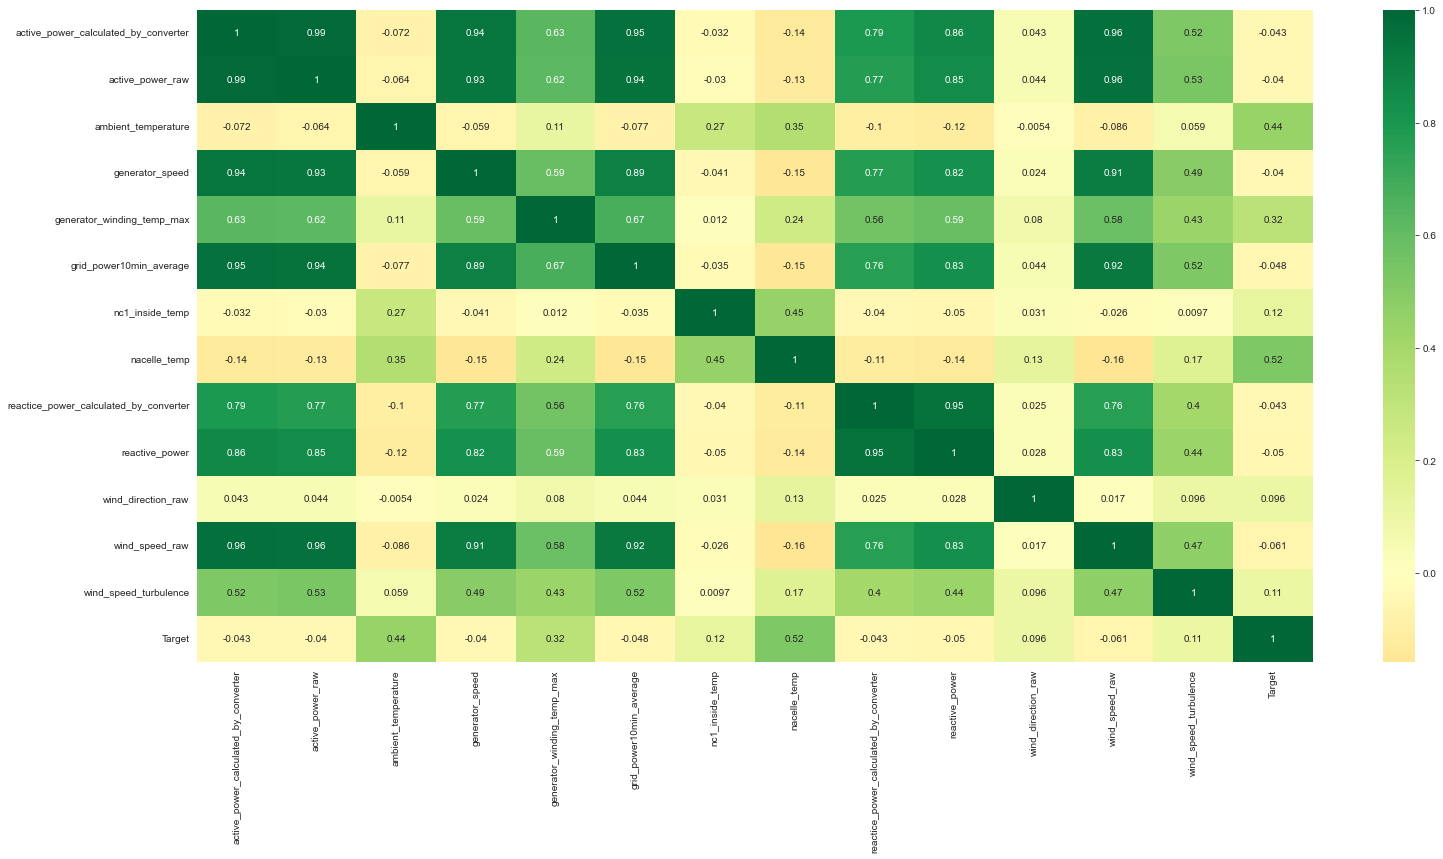

In [75]:
# Plotting a heatmap plot to get an initial sense of the features that impact Target variable (Temperature)
from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=train_num.corr(method='spearman'), cmap='RdYlGn', annot=True, center=0)

**Target vs Independent Variables correlation**

The target variable (Temperature denoted by column name 'Target') seems to be correlated by only a few, based on the coefficient values namely:
* ambient temperature (+ve)
* generator winding temperature max (+ve)
* nacelle temp (+ve)
* active_power_calculated_by_converter (-ve)
* grid_power_10min_average (-ve)
* reactice_power_calculated_by_converter (-ve)

Quite a few features appear to be highly correlated to each other. We will work on Feature Selection further to reduce the dimensionality in the dataset and come with a set of features that appear to impact the target variable the most.

**Wrapper Methods for Feature Selection**

* Sequential Feature Selector - Forward Selection 
* Backward Elimination - Recursive Feature Elimination (RFE)
* Stepwise Selection: Bi-directional with a combination of Forward Selection & Backward Elimination

In [76]:
from math import sqrt
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

**Forward Selection Method - SFS() from Mlxtend**

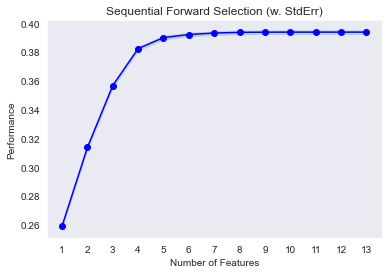

In [77]:
# importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Sequential Feature Selection (SFS)
sfs = SFS(LinearRegression(), k_features=13, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#sfs.k_feature_names_ # to get the final set of features

We can see that the performance fairly remains same after k_features reaches around 10 or 11. We will identify those 10 features next.

In [78]:
sfs = SFS(LinearRegression(), k_features=10, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
#sfs.subsets_
selected_2 = pd.DataFrame({'Feature' : sfs.k_feature_names_})
print(selected_2)

                                Feature
0  active_power_calculated_by_converter
1                   ambient_temperature
2            generator_winding_temp_max
3               grid_power10min_average
4                       nc1_inside_temp
5                          nacelle_temp
6                        reactive_power
7                    wind_direction_raw
8                        wind_speed_raw
9                 wind_speed_turbulence


**Backward Elimination: Recursive Forward Elimination Method RFE() from Sklearn**

In [79]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
#names = pd.DataFrame(X.columns)
model = LinearRegression()

#Define RFE with 8 features to be selected as per the plot above
rfe = RFE(model, step=1) 
my_values = rfe.fit(X,y)

#Create a dataframe for the results
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {
            'Feature' : num_cols[i],
            'Selected' : my_values.support_[i],
            'RFE_Ranking' : my_values.ranking_[i]
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name = 'Columns'
df_RFE_results

,Feature,Selected,RFE_Ranking
Columns,,,
0,active_power_calculated_by_converter,False,3
1,active_power_raw,False,7
2,ambient_temperature,True,1
3,generator_speed,False,4
4,generator_winding_temp_max,True,1
5,grid_power10min_average,False,2
6,nc1_inside_temp,True,1
7,nacelle_temp,True,1
8,reactice_power_calculated_by_converter,False,8


In [80]:
selected_3 = df_RFE_results[df_RFE_results['RFE_Ranking'] == 1]
print(selected_3)

                            Feature  Selected  RFE_Ranking
Columns                                                   
2               ambient_temperature      True            1
4        generator_winding_temp_max      True            1
6                   nc1_inside_temp      True            1
7                      nacelle_temp      True            1
11                   wind_speed_raw      True            1
12            wind_speed_turbulence      True            1


In [81]:
model1 = XGBRegressor(booster='gblinear')
rfe1 = RFE(model1, step=1) 
my_values_xg = rfe1.fit(X,y)

#Create a dataframe for the results
df_RFE_xgresults = []
for i in range(X.shape[1]):
    df_RFE_xgresults.append(
        {
            'Feature' : num_cols[i],
            'Selected' : my_values_xg.support_[i],
            'RFE_Ranking' : my_values_xg.ranking_[i]
        }
    )

df_RFE_xgresults = pd.DataFrame(df_RFE_xgresults)
df_RFE_xgresults.index.name = 'Columns'
df_RFE_xgresults

,Feature,Selected,RFE_Ranking
Columns,,,
0,active_power_calculated_by_converter,False,4
1,active_power_raw,True,1
2,ambient_temperature,True,1
3,generator_speed,True,1
4,generator_winding_temp_max,True,1
5,grid_power10min_average,False,3
6,nc1_inside_temp,False,7
7,nacelle_temp,True,1
8,reactice_power_calculated_by_converter,False,5


In [82]:
selected_4 = df_RFE_xgresults[df_RFE_xgresults['RFE_Ranking'] == 1]
print(selected_4)

                            Feature  Selected  RFE_Ranking
Columns                                                   
1                  active_power_raw      True            1
2               ambient_temperature      True            1
3                   generator_speed      True            1
4        generator_winding_temp_max      True            1
7                      nacelle_temp      True            1
11                   wind_speed_raw      True            1


**Stepwise Elimination**

In [83]:
sffs = SFS(LinearRegression(), forward=True, floating=True, scoring='r2', cv=5)
sffs.fit(X, y)
#sfs.subsets_
selected_5 = pd.DataFrame({'Feature' : sffs.k_feature_names_})
print(selected_5)

        Feature
0  nacelle_temp


In [84]:
feat_list = {'SelectKBest' : selected_1['Feature'],
            'SFS FS' : selected_2['Feature'], 
            'RFE Linear' : selected_3['Feature'],
            'RFE XGB' : selected_4['Feature'],            
            'SFFS Stepwise' : selected_5['Feature']
            }
key_features = pd.DataFrame(feat_list)
key_features = key_features.apply(lambda x: pd.Series(x.dropna().values))
key_features

,SelectKBest,SFS FS,RFE Linear,RFE XGB,SFFS Stepwise
0,active_power_calculated_by_converter,active_power_calculated_by_converter,ambient_temperature,active_power_raw,nacelle_temp
1,active_power_raw,ambient_temperature,generator_winding_temp_max,ambient_temperature,NaN
2,ambient_temperature,generator_winding_temp_max,nc1_inside_temp,generator_speed,NaN
3,generator_winding_temp_max,grid_power10min_average,nacelle_temp,generator_winding_temp_max,NaN
4,grid_power10min_average,nc1_inside_temp,wind_speed_raw,nacelle_temp,NaN
5,nc1_inside_temp,nacelle_temp,wind_speed_turbulence,wind_speed_raw,NaN
6,nacelle_temp,reactive_power,NaN,NaN,NaN
7,wind_direction_raw,wind_direction_raw,NaN,NaN,NaN
8,wind_speed_raw,wind_speed_raw,NaN,NaN,NaN
9,wind_speed_turbulence,wind_speed_turbulence,NaN,NaN,NaN


**MODEL BUILDING - ALL FEATURES**

We will now test multiple REGRESSION models (Linear, RandomForest, Bagging, XGBoost & K-Neighbours) with the full dataset and compare the results. 

Later on, we will do the same with the selected featuresß dataset.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# creating test set of feature columns for prediction
#X_test = test[feat_cols]

In [53]:
#X_test.shape

In [87]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 13) (818643,) (90961, 13) (90961,)


LINEAR REGRESSION

In [88]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100

rmse_lr = np.sqrt(mean_squared_error(y_val, lr_pred))
mae_lr = mean_absolute_error(y_val, lr_pred)
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)*100
r2_lr = r2_score(y_val, lr_pred)*100

print(f"Training accuracy: {lr_train_acc}")
print(f"Validation accuracy: {lr_val_acc}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression Mean Absolute Error: {mae_lr}")
print(f"Linear Regression R^2 Model Score: {r2_lr} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr} %")


Training accuracy: 39.3567383025982
Validation accuracy: 39.58916437598865
Linear Regression RMSE: 2.023331934344201
Linear Regression Mean Absolute Error: 1.4123413456579206
Linear Regression R^2 Model Score: 39.58916437598865 %
Linear Regression Mean Absolute Percent Error: 3.025746368871076 %


In [30]:
test['Target'] = lr_model.predict(X_test)
test['Target'].to_csv('./ReNew_Participants_Data/lr_submission.csv', index=False, header=True)

In [31]:
sub = pd.read_csv('./ReNew_Participants_Data/lr_submission.csv')
sub.shape

(303202, 1)

K-NEIGHBOURS

In [89]:
# Initiate a K-Neighbours model and fit to the training data
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)

knn_train_acc = (knn_model.score(X_train, y_train))*100
knn_val_acc = (knn_model.score(X_val, y_val))*100

rmse_knn = np.sqrt(mean_squared_error(y_val, knn_pred))
mae_knn = mean_absolute_error(y_val, knn_pred)
mape_knn = mean_absolute_percentage_error(y_val, knn_pred)*100
r2_knn = r2_score(y_val, knn_pred)*100

print(f"Training accuracy: {knn_train_acc}")
print(f"Validation accuracy: {knn_val_acc}")
print(f"KNN Model RMSE: {rmse_knn}")
print(f"KNN Model Mean Absolute Error: {mae_knn}")
print(f"KNN Model R^2 Model Score: {r2_knn} %")
print(f"KNN Model Mean Absolute Percent Error: {mape_knn} %")

Training accuracy: 72.55286843693585
Validation accuracy: 57.4397318396068
KNN Model RMSE: 1.698290156400095
KNN Model Mean Absolute Error: 1.12937016964295
KNN Model R^2 Model Score: 57.4397318396068 %
KNN Model Mean Absolute Percent Error: 2.4205625372530792 %


RANDOM FOREST REGRESSION

In [90]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100

rmse_rf = np.sqrt(mean_squared_error(y_val, rf_pred))
mae_rf = mean_absolute_error(y_val, rf_pred)
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)*100
r2_rf = r2_score(y_val, rf_pred)*100

print(f"Training accuracy: {rf_train_acc}")
print(f"Validation accuracy: {rf_val_acc}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest Model Mean Absolute Error: {mae_rf}")
print(f"Random Forest Model R^2 Model Score: {r2_rf} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf} %")

Training accuracy: 97.0395232458803
Validation accuracy: 78.7854196875135
Random Forest RMSE: 1.1990214066185205
Random Forest Model Mean Absolute Error: 0.7358654525994452
Random Forest Model R^2 Model Score: 78.7854196875135 %
Random Forest Model Mean Absolute Percent Error: 1.5717625936056139 %


In [91]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)

,Score
ambient_temperature,0.253612
nacelle_temp,0.233846
generator_winding_temp_max,0.107253
nc1_inside_temp,0.100934
wind_direction_raw,0.081503
grid_power10min_average,0.059715
wind_speed_turbulence,0.034027
reactive_power,0.028282
active_power_calculated_by_converter,0.027158
reactice_power_calculated_by_converter,0.023558


----*Top 8 from 10 for RF Regressor for full dataset*
* ambient temperature
* nacelle_temp
* generator_winding_temp_max
* nc1_inside_temp
* wind_direction_raw
* grid_power10min_average
* wind_speed_turbulence
* reactive_power

---- *omitted in RF Regressor for full dataset selecting the top 10 but selected in top 8 from FS*
* wind_speed_raw

---- *Top 8 Selected features from Feature Selection techniques*
* ambient temperature
* generator_winding_temp_max
* nc1_inside_temp
* nacelle_temp
* reactice_power_calculated_by_converter
* reactive_power
* wind_speed_raw
* wind_speed_turbulence

XG BOOST

In [92]:
XGB_model = XGBRegressor(random_state=42)
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_val)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_val, y_val))*100

rmse_xg = np.sqrt(mean_squared_error(y_val, XGB_pred))
mae_xg = mean_absolute_error(y_val, XGB_pred)
mape_xg = mean_absolute_percentage_error(y_val, XGB_pred)*100
r2_xg = r2_score(y_val, XGB_pred)*100

print(f"Training accuracy: {xg_train_acc}")
print(f"Validation accuracy: {xg_val_acc}")
print(f"XGBoost Model RMSE: {rmse_xg}")
print(f"XGBoost Model Mean Absolute Error: {mae_xg}")
print(f"XGBoost Model R^2 Model Score: {r2_xg} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg} %")


Training accuracy: 68.27350381265092
Validation accuracy: 66.94063233697443
XGBoost Model RMSE: 1.4967766026955447
XGBoost Model Mean Absolute Error: 1.0246333524942948
XGBoost Model R^2 Model Score: 66.94063233697443 %
XGBoost Model Mean Absolute Percent Error: 2.1993857043777405 %


BAGGING

In [93]:
Bag_model = BaggingRegressor()
Bag_model.fit(X_train, y_train)
Bag_pred = Bag_model.predict(X_val)

bg_train_acc = (Bag_model.score(X_train, y_train))*100
bg_val_acc = (Bag_model.score(X_val, y_val))*100

rmse_bg = np.sqrt(mean_squared_error(y_val, Bag_pred))
mae_bg = mean_absolute_error(y_val, Bag_pred)
mape_bg = mean_absolute_percentage_error(y_val, Bag_pred)*100
r2_bg = r2_score(y_val, Bag_pred)*100

print(f"Training accuracy: {bg_train_acc}")
print(f"Validation accuracy: {bg_val_acc}")
print(f"Bagging Model RMSE: {rmse_bg}")
print(f"Bagging Model Mean Absolute Error: {mae_bg}")
print(f"Bagging Model R^2 Model Score: {r2_bg} %")
print(f"Bagging Model Mean Absolute Percent Error: {mape_bg} %")

Training accuracy: 95.61326893226398
Validation accuracy: 75.97713602323478
Bagging Model RMSE: 1.275916064963306
Bagging Model Mean Absolute Error: 0.7878518989337592
Bagging Model R^2 Model Score: 75.97713602323478 %
Bagging Model Mean Absolute Percent Error: 1.6833156124161202 %


**MODEL EVALUATION TABLE**

In [94]:
models = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor', 
             'Bagging Regressor', 'K-Nearest Neighbours Regressor', 'Random Forest Regressor'],
    'Training Accuracy' : [lr_train_acc, xg_train_acc, bg_train_acc, knn_train_acc, rf_train_acc],
    'Validation Accuracy' : [lr_val_acc, xg_val_acc, bg_val_acc, knn_val_acc, rf_val_acc],
    'RMSE Score' : [rmse_lr, rmse_xg, rmse_bg, rmse_knn, rmse_rf],
    'MAPE Score (%)' : [mape_lr, mape_xg, mape_bg, mape_knn, mape_rf],
    'Model R^2 Score (%)': [ r2_lr, r2_xg, r2_bg, r2_knn, r2_rf]
})

models.sort_values(by = ['MAPE Score (%)'],ascending = True)

,Model,Training Accuracy,Validation Accuracy,RMSE Score,MAPE Score (%),Model R^2 Score (%)
4,Random Forest Regressor,97.039523,78.785420,1.199021,1.571763,78.785420
2,Bagging Regressor,95.613269,75.977136,1.275916,1.683316,75.977136
1,XGBoost Regressor,68.273504,66.940632,1.496777,2.199386,66.940632
3,K-Nearest Neighbours Regressor,72.552868,57.439732,1.698290,2.420563,57.439732
0,Linear Regression,39.356738,39.589164,2.023332,3.025746,39.589164


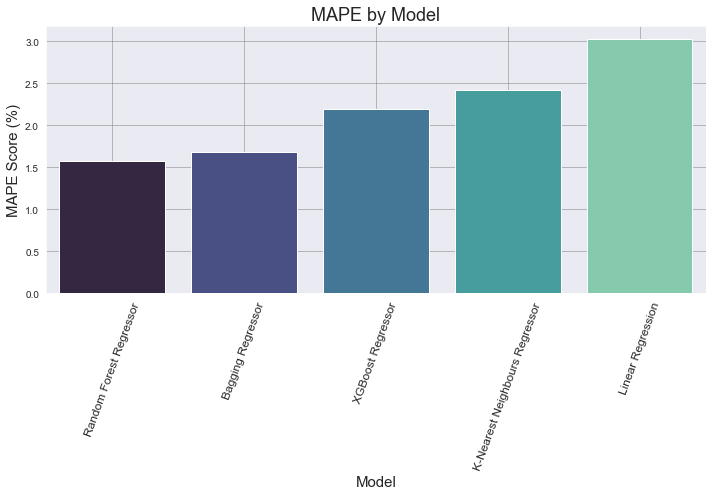

In [95]:
order = list(models.sort_values('MAPE Score (%)', ascending=True).Model)

plt.figure(figsize=(10,7))
# make barplot and sort bars
x = sns.barplot(x='Model', y='MAPE Score (%)', data=models, order=order, palette="mako")
plt.xlabel("Model", fontsize=15)
plt.ylabel("MAPE Score (%)", fontsize=15)
plt.title("MAPE by Model", fontsize=18)

plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

plt.tight_layout()

It looks like the Random Forest Regressor has performed well with the lowest MAPE value amongst all and with the highest model score overall.

We will now run the same models with the features derived from Feature Selection methods and check if there is a difference in the above comparison.

**MODEL BUILDING - WITH SELECTED COLUMNS FROM FEATURE SELECTION**

* ambient temperature
* generator_winding_temp_max
* nc1_inside_temp
* nacelle_temp
* reactice_power_calculated_by_converter
* reactive_power
* wind_speed_raw
* wind_speed_turbulence

In [39]:
# Columns derived from the Feature Selection methods (Top 8)
sel_cols = ['ambient_temperature','generator_winding_temp_max', 'nc1_inside_temp', 'nacelle_temp',
            'reactice_power_calculated_by_converter', 'reactive_power', 'wind_speed_raw', 'wind_speed_turbulence']

X = train[sel_cols]
y = train['Target']

X.shape

# creating test set of the selected feature columns for prediction
X_test = test[sel_cols]

In [40]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

In [41]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100

rmse_lr = np.sqrt(mean_squared_error(y_val, lr_pred))
mae_lr = mean_absolute_error(y_val, lr_pred)
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)*100
r2_lr = r2_score(y_val, lr_pred)*100

print(f"Training accuracy: {lr_train_acc}")
print(f"Validation accuracy: {lr_val_acc}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression Mean Absolute Error: {mae_lr}")
print(f"Linear Regression R^2 Model Score: {r2_lr} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr} %")

Training accuracy: 40.649513854402045
Validation accuracy: 40.819164930820115
Linear Regression RMSE: 2.002627884702588
Linear Regression Mean Absolute Error: 1.3955651606703636
Linear Regression R^2 Model Score: 40.819164930820115 %
Linear Regression Mean Absolute Percent Error: 2.9876286342262035 %


In [42]:
# Initiate a K-Neighbours model and fit to the training data
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)

knn_train_acc = (knn_model.score(X_train, y_train))*100
knn_val_acc = (knn_model.score(X_val, y_val))*100

rmse_knn = np.sqrt(mean_squared_error(y_val, knn_pred))
mae_knn = mean_absolute_error(y_val, knn_pred)
mape_knn = mean_absolute_percentage_error(y_val, knn_pred)*100
r2_knn = r2_score(y_val, knn_pred)*100

print(f"Training accuracy: {knn_train_acc}")
print(f"Validation accuracy: {knn_val_acc}")
print(f"KNN Model RMSE: {rmse_knn}")
print(f"KNN Model Mean Absolute Error: {mae_knn}")
print(f"KNN Model R^2 Model Score: {r2_knn} %")
print(f"KNN Model Mean Absolute Percent Error: {mape_knn} %")

Training accuracy: 70.18671289668683
Validation accuracy: 53.9111765380653
KNN Model RMSE: 1.7672888009733478
KNN Model Mean Absolute Error: 1.1709345610319148
KNN Model R^2 Model Score: 53.9111765380653 %
KNN Model Mean Absolute Percent Error: 2.50760316701964 %


In [44]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100

rmse_rf = np.sqrt(mean_squared_error(y_val, rf_pred))
mae_rf = mean_absolute_error(y_val, rf_pred)
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)*100
r2_rf = r2_score(y_val, rf_pred)*100

print(f"Training accuracy: {rf_train_acc}")
print(f"Validation accuracy: {rf_val_acc}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest Model Mean Absolute Error: {mae_rf}")
print(f"Random Forest Model R^2 Model Score: {r2_rf} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf} %")

Training accuracy: 96.0889050845638
Validation accuracy: 72.26727262114112
Random Forest RMSE: 1.370900723857173
Random Forest Model Mean Absolute Error: 0.858728860744051
Random Forest Model R^2 Model Score: 72.26727262114112 %
Random Forest Model Mean Absolute Percent Error: 1.8338266850210325 %


In [ ]:
# XG Boost Regressor
XGB_model = XGBRegressor(random_state=42)
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_val)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_val, y_val))*100

rmse_xg = np.sqrt(mean_squared_error(y_val, XGB_pred))
mae_xg = mean_absolute_error(y_val, XGB_pred)
mape_xg = mean_absolute_percentage_error(y_val, XGB_pred)*100
r2_xg = r2_score(y_val, XGB_pred)*100

print(f"Training accuracy: {xg_train_acc}")
print(f"Validation accuracy: {xg_val_acc}")
print(f"XGBoost Model RMSE: {rmse_xg}")
print(f"XGBoost Model Mean Absolute Error: {mae_xg}")
print(f"XGBoost Model R^2 Model Score: {r2_xg} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg} %")

Training accuracy: 63.325348383339474
Validation accuracy: 62.22774621382845
XGBoost Model RMSE: 1.599912251313865
XGBoost Model Mean Absolute Error: 1.0819330557609736
XGBoost Model R^2 Model Score: 62.22774621382845 %
XGBoost Model Mean Absolute Percent Error: 2.3182648144265547 %


In [ ]:
# Bagging Regressor
Bag_model = BaggingRegressor()
Bag_model.fit(X_train, y_train)
Bag_pred = Bag_model.predict(X_val)

bg_train_acc = (Bag_model.score(X_train, y_train))*100
bg_val_acc = (Bag_model.score(X_val, y_val))*100

rmse_bg = np.sqrt(mean_squared_error(y_val, Bag_pred))
mae_bg = mean_absolute_error(y_val, Bag_pred)
mape_bg = mean_absolute_percentage_error(y_val, Bag_pred)*100
r2_bg = r2_score(y_val, Bag_pred)*100

print(f"Training accuracy: {bg_train_acc}")
print(f"Validation accuracy: {bg_val_acc}")
print(f"Bagging Model RMSE: {rmse_bg}")
print(f"Bagging Model Mean Absolute Error: {mae_bg}")
print(f"Bagging Model R^2 Model Score: {r2_bg} %")
print(f"Bagging Model Mean Absolute Percent Error: {mape_bg} %")

Training accuracy: 94.35708827200897
Validation accuracy: 68.89716372429919
Bagging Model RMSE: 1.4518097599151625
Bagging Model Mean Absolute Error: 0.9146817828588005
Bagging Model R^2 Model Score: 68.89716372429919 %
Bagging Model Mean Absolute Percent Error: 1.9542695558770407 %


In [ ]:
models_sel = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor', 
             'Bagging Regressor', 'K-Nearest Neighbours Regressor', 'Random Forest Regressor'],
    'Training Accuracy' : [lr_train_acc, xg_train_acc, bg_train_acc, knn_train_acc, rf_train_acc],
    'Validation Accuracy' : [lr_val_acc, xg_val_acc, bg_val_acc, knn_val_acc, rf_val_acc],
    'RMSE Score' : [rmse_lr, rmse_xg, rmse_bg, rmse_knn, rmse_rf],
    'MAPE Score (%)' : [mape_lr, mape_xg, mape_bg, mape_knn, mape_rf],
    'Model R^2 Score (%)': [ r2_lr, r2_xg, r2_bg, r2_knn, r2_rf]
})

models_sel.sort_values(by = ['MAPE Score (%)'],ascending = True)

,Model,Training Accuracy,Validation Accuracy,RMSE Score,MAPE Score (%),Model R^2 Score (%)
4,Random Forest Regressor,96.088905,72.267273,1.370901,1.833827,72.267273
2,Bagging Regressor,94.357088,68.897164,1.451810,1.954270,68.897164
1,XGBoost Regressor,63.325348,62.227746,1.599912,2.318265,62.227746
3,K-Nearest Neighbours Regressor,70.186713,53.911177,1.767289,2.507603,53.911177
0,Linear Regression,40.649514,40.819165,2.002628,2.987629,40.819165


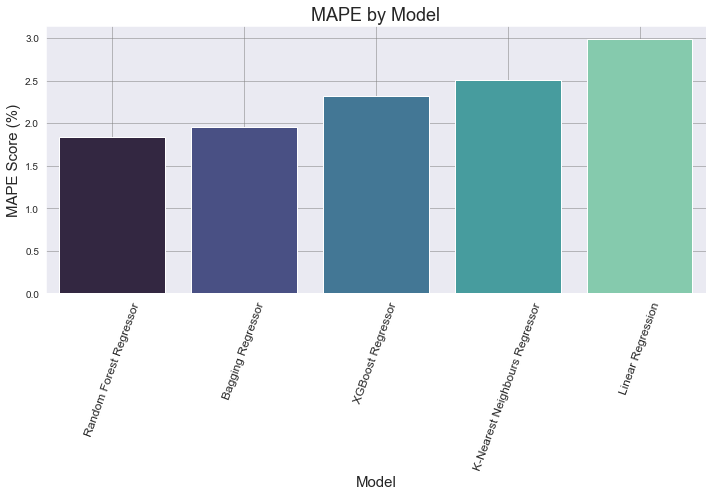

In [ ]:
order = list(models_sel.sort_values('MAPE Score (%)', ascending=True).Model)

plt.figure(figsize=(10,7))
# make barplot and sort bars
x = sns.barplot(x='Model', y='MAPE Score (%)', data=models_sel, order=order, palette="mako")
plt.xlabel("Model", fontsize=15)
plt.ylabel("MAPE Score (%)", fontsize=15)
plt.title("MAPE by Model", fontsize=18)

plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

plt.tight_layout()

For both the approaches (Full Dataset & Dataset with Selected Features), Random Forest seems to be the best model. I will try and optimize the Random Forest model a little more to use the RandomSearch CV and GridSearch CV methods to check if we can improve the accuracy scores for both approaches.

**RF MODEL BUILDING - WITH SELECTED COLUMNS FROM RANDOM FOREST REGRESSOR**

In [ ]:
# Columns derived from the Feature Selection methods (all 10)
rf_cols = ['ambient_temperature','generator_winding_temp_max', 'nc1_inside_temp', 'nacelle_temp', 
            'grid_power10min_average', 'reactice_power_calculated_by_converter', 'reactive_power',
            'wind_direction_raw', 'wind_speed_turbulence', 'active_power_calculated_by_converter']

X_rf = train[rf_cols]
y_rf = train['Target']

# creating test set of the selected feature columns for prediction
X_test = test[sel_cols]

X_rf.shape

(909604, 10)

In [ ]:
X_rf_train, X_rf_val, y_rf_train, y_rf_val = train_test_split(X_rf, y_rf, train_size=0.9, random_state=42)

print(X_rf_train.shape, y_rf_train.shape, X_rf_val.shape, y_rf_val.shape)

(818643, 10) (818643,) (90961, 10) (90961,)


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_rf_train, y_rf_train)
rf_pred = rf_model.predict(X_rf_val)

rf_train_acc = (rf_model.score(X_rf_train, y_rf_train))*100
rf_val_acc = (rf_model.score(X_rf_val, y_rf_val))*100

rmse_rf = np.sqrt(mean_squared_error(y_rf_val, rf_pred))
mae_rf = mean_absolute_error(y_rf_val, rf_pred)
mape_rf = mean_absolute_percentage_error(y_rf_val, rf_pred)*100
r2_rf = r2_score(y_rf_val, rf_pred)*100

print(f"Training accuracy: {rf_train_acc}")
print(f"Validation accuracy: {rf_val_acc}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest Model Mean Absolute Error: {mae_rf}")
print(f"Random Forest Model R^2 Model Score: {r2_rf} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf} %")

Training accuracy: 97.06468991923187
Validation accuracy: 78.95497658737605
Random Forest RMSE: 1.1942202226430687
Random Forest Model Mean Absolute Error: 0.730179753278911
Random Forest Model R^2 Model Score: 78.95497658737605 %
Random Forest Model Mean Absolute Percent Error: 1.559409535868495 %


**PREDICTION**

As we can see from the above the RF Regressor on the 10 features as derived from the initial RF regressor model provided a slightly better model in terms of MAPE value. We will consider the above RF Model to predict on the test set and generate the submission file.

In [47]:
test['Target'] = rf_model.predict(X_test)
test['Target'].to_csv('./ReNew_Participants_Data/my_submission.csv', index=False)